<a href="https://colab.research.google.com/github/ashwin-s-ranade/168-Final-Project/blob/main/Ashwin_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from https://stackoverflow.com/questions/58890109/line-wrapping-in-collaboratory-google-results
#used to wrap results text

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
#upload moviedynamics folder from github

!git clone https://github.com/ashwin-s-ranade/168-Final-Project.git

Cloning into '168-Final-Project'...
remote: Enumerating objects: 31086, done.
remote: Counting objects: 100% (31086/31086), done.
remote: Compressing objects: 100% (31077/31077), done.
remote: Total 31086 (delta 7), reused 31083 (delta 7), pack-reused 0
Receiving objects: 100% (31086/31086), 24.44 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (31081/31081), done.


In [3]:
#the files are located in ./168-Final-Project/moviedynamics
!ls 168-Final-Project

moviedynamics  README.md


In [4]:
!ls 168-Final-Project/moviedynamics | grep "New Hope"

(1977) - Star Wars: Episode IV - A New Hope - actors.json
(1977) - Star Wars: Episode IV - A New Hope.json


In [5]:
#test on wolf of wall street 

#plan: 
#1) compute centralities for all nodes in network; 
#check if they match with the "official" main characters

#2) for the top x,y,z characters, compute: 
#average closeness centrality, betweenness centrality, as well as how variable(??) centralities are?

#3) regress above metrics against: 
#movie rating
#movie year

In [6]:
#not really sure the difference between "Movie - actors.json" and "Movie.json"
import networkx as nx
from networkx.readwrite import json_graph
import json
filename = "./168-Final-Project/moviedynamics/(2008) - The Dark Knight - actors.json"
filename = "./168-Final-Project/moviedynamics/(1977) - Star Wars: Episode IV - A New Hope - actors.json"
data = json.load(open(filename))

#get info about the movie
print(data["graph"])
print()

G = json_graph.node_link_graph(data)

print(G.nodes)
print(len(G))

{'imdb_rating': 8.6, 'movie_name': 'Star Wars: Episode IV - A New Hope ', 'movie_year': 1977}

['Harrison Ford', 'Mark Hamill', 'David Prowse', 'Alec Guinness', 'Carrie Fisher', 'Phil Brown', 'Scott Beach', 'Garrick Hagon', 'Graham Ashley', 'Drewe Henley']
10


In [7]:
a = nx.closeness_centrality(G)
b = nx.betweenness_centrality(G)
c = nx.pagerank(G)

i = 0
printer = ["closeness centrality", "betweenness centrality", "pagerank"]

for d in [a,b,c]:
  #sort by value in descending order; output is a list of tuples
  tuple_list = sorted(d.items(), key = lambda x : x[1], reverse=True)

  #top 10 characters
  print(printer[i], [x[0] for x in tuple_list[:5]])
  i+=1

closeness centrality ['Mark Hamill', 'Alec Guinness', 'David Prowse', 'Garrick Hagon', 'Harrison Ford']
betweenness centrality ['Mark Hamill', 'Alec Guinness', 'David Prowse', 'Garrick Hagon', 'Harrison Ford']
pagerank ['Mark Hamill', 'Alec Guinness', 'Graham Ashley', 'Drewe Henley', 'Garrick Hagon']


In [8]:
#now, we can craft a function
#input: filename, e.g. "./168-Final-Project/moviedynamics/(2013) - The Wolf of Wall Street.json"
#output: 
# - top 5 characters
# - average [closeness centrality, betweenness centrality] for the top [x,y,z] characters
# - movie year 
# - movie name
# - movie rating

import numpy as np

x,y,z = 1,3,10

def get_movie_info(filename): 
  data = json.load(open(filename))
  info_dict = data["graph"]

  G = json_graph.node_link_graph(data)

  

  #takes in dict 
  #returns average of top x,y,z values 
  def return3(d): 
    arr = sorted(d.items(), key = lambda x : x[1], reverse=True)

    #add top res
    top_x = np.mean([a[1] for a in arr[:x]])
    top_y = np.mean([a[1] for a in arr[:y]])
    top_z = np.mean([a[1] for a in arr[:z]])

    return [top_x, top_y, top_z]

  cc = nx.closeness_centrality(G)
  bc = nx.betweenness_centrality(G)
  pr = nx.pagerank(G)
  nd = dict(G.degree())
  kc = nx.katz_centrality_numpy(G)

  #return tuple -- string, float, int, [float], [float], [float], networkx graph object, dict, dict, dict
  #movie name, rating, year, [closeness centrality for top 1,3,10], [betweenness centrality for top 1,3,10], [pagerank for top 1,3,10], G, cc, bc, pr

  return info_dict["movie_name"], info_dict["imdb_rating"], info_dict["movie_year"], return3(cc), return3(bc), return3(pr), G, cc, bc, pr, return3(nd), return3(kc), nd, kc

get_movie_info("./168-Final-Project/moviedynamics/(2013) - The Wolf of Wall Street.json")


('The Wolf of Wall Street',
 8.2,
 2013,
 [1.0, 0.899749373433584, 0.7171786108628213],
 [0.33356649752926343, 0.19611574890830208, 0.07205960730561793],
 [0.2399075362607358, 0.1428831064667663, 0.061688644885010156],
 {'Agent Hughes': 0.5161290322580645,
  'Agent Patrick Denham': 0.631578947368421,
  "Alden Kupferberg ('Sea Otter')": 0.6153846153846154,
  'Aunt Emma': 0.6,
  'Barry Kleinman': 0.5783132530120482,
  'Ben Jenner': 0.5393258426966292,
  'Blair Hollingsworth': 0.5647058823529412,
  'Blue Chip Hooker': 0.5106382978723404,
  'Bo Dietl': 0.5393258426966292,
  'Brad Bodnick': 0.6857142857142857,
  'Brookville Police Officer #1': 0.5333333333333333,
  'Captain Ted Beecham': 0.5454545454545454,
  'Chantalle': 0.5333333333333333,
  'Chester Ming': 0.5925925925925926,
  'Cristy': 0.5333333333333333,
  'Danielle Harrison': 0.5106382978723404,
  'Donnie Azoff': 0.8421052631578947,
  'Heidi': 0.5161290322580645,
  'Helicopter Pilot': 0.5217391304347826,
  'Hildy Azoff': 0.5217391304

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

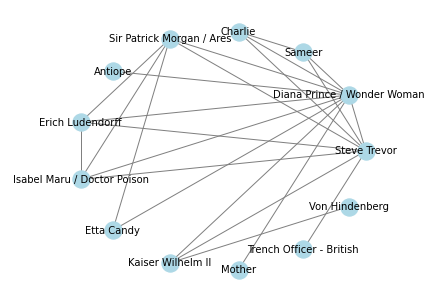

In [9]:
import matplotlib.pyplot as plt
from google.colab import files
testing = get_movie_info("./168-Final-Project/moviedynamics/(2017) - Wonder Woman.json")
nx.draw_circular(testing[6], with_labels=True, edge_color='grey', node_color="lightblue", font_size = 10)
l,r = plt.xlim()
plt.xlim(l-0.3,r+0.3)
plt.savefig('wonder_woman.png')
files.download('wonder_woman.png')

In [10]:
#so the data points we regress for will be: 
#year vs [cc], rating vs [cc], year vs [bc], rating vs [bc] {12 graphs in total}

names = []
rating = []
year = []
graphs = []

ccTop1 = []
ccTop3 = []
ccTop10 = []

bcTop1 = []
bcTop3 = []
bcTop10 = []

prTop1 = []
prTop3 = []
prTop10 = []

kcTop1 = []
kcTop3 = []
kcTop10 = []

ndTop1 = []
ndTop3 = []
ndTop10 = []

cc = []
bc = []
pr = []
nd = []
kc = []

get_movie_info output:

[0] movie name

[1] rating

[2] year

[3] top cc's

[4] top bc's

[5] top pr's

[6] G

[7] cc

[8] bc

[9] pr

[10] top nd's

[11] top kc's

[12] nd

[13] kc

In [11]:
import os 

results = [f for f in os.listdir("./168-Final-Project/moviedynamics") if "- actors.json" in f]
print(len(results))

for filename in results: 
  tup = get_movie_info("/content/168-Final-Project/moviedynamics/" + filename)
  names.append(tup[0])
  rating.append(tup[1])
  year.append(tup[2])
  ccTop1.append(tup[3][0])
  ccTop3.append(tup[3][1])
  ccTop10.append(tup[3][2])
  bcTop1.append(tup[4][0])
  bcTop3.append(tup[4][1])
  bcTop10.append(tup[4][2])
  prTop1.append(tup[5][0])
  prTop3.append(tup[5][1])
  prTop10.append(tup[5][2])
  graphs.append(tup[6])
  cc.append(tup[7])
  bc.append(tup[8])
  pr.append(tup[9])
  ndTop1.append(tup[10][0])
  ndTop3.append(tup[10][1])
  ndTop10.append(tup[10][2])
  kcTop1.append(tup[11][0])
  kcTop3.append(tup[11][1])
  kcTop10.append(tup[11][2])
  nd.append(tup[12])
  kc.append(tup[13])

15540


In [12]:
import matplotlib.pyplot as plt

# plots (3 subplots per):
# 1. cc against rating 
# 2. cc against year
# 3. bc against rating
# 4. bc against year
# 5. pr against rating
# 6. pr against year
# 7. kc against rating
# 8. kc against year
# 9. nd against rating
# 10. nd against year

# dataframe: summarizing all r's

Text(0.5, 0.98, 'Closeness Centrality of Top 1, 3, 10 Characters vs Rating')

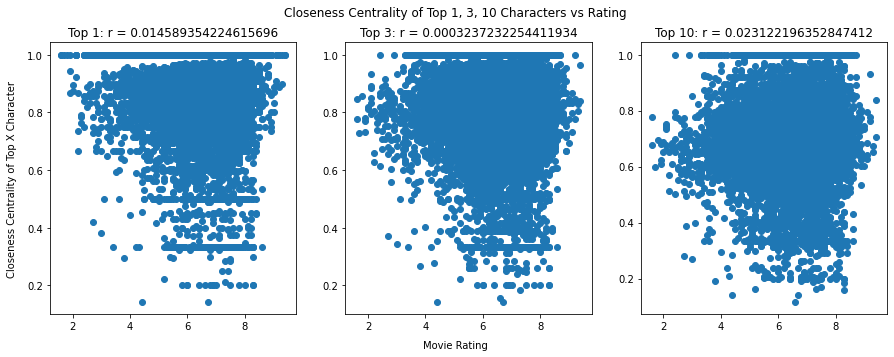

In [13]:
# 1. cc against rating 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(rating, ccTop1)
ax1.set_title(f'Top 1: r = {np.corrcoef(rating, ccTop1)[0,1]}')
ax2.scatter(rating, ccTop3)
ax2.set_title(f'Top 3: r = {np.corrcoef(rating, ccTop3)[0,1]}')
ax3.scatter(rating, ccTop10)
ax3.set_title(f'Top 10: r = {np.corrcoef(rating, ccTop10)[0,1]}')

fig.text(0.5,0.04, "Movie Rating", ha="center", va="center")
fig.text(0.09,0.5, "Closeness Centrality of Top X Character", ha="center", va="center", rotation=90)

plt.suptitle("Closeness Centrality of Top 1, 3, 10 Characters vs Rating")

Text(0.5, 0.98, 'Closeness Centrality of Top 1, 3, 10 Characters vs Year')

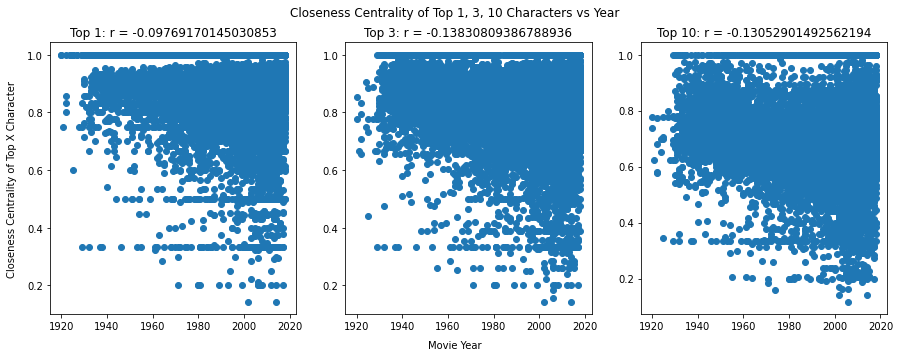

In [14]:
# 2. cc against year 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(year, ccTop1)
ax1.set_title(f'Top 1: r = {np.corrcoef(year, ccTop1)[0,1]}')
ax2.scatter(year, ccTop3)
ax2.set_title(f'Top 3: r = {np.corrcoef(year, ccTop3)[0,1]}')
ax3.scatter(year, ccTop10)
ax3.set_title(f'Top 10: r = {np.corrcoef(year, ccTop10)[0,1]}')

fig.text(0.5,0.04, "Movie Year", ha="center", va="center")
fig.text(0.09,0.5, "Closeness Centrality of Top X Character", ha="center", va="center", rotation=90)

plt.suptitle("Closeness Centrality of Top 1, 3, 10 Characters vs Year")

Text(0.5, 0.98, 'Betweenness Centrality of Top 1, 3, 10 Characters vs Rating')

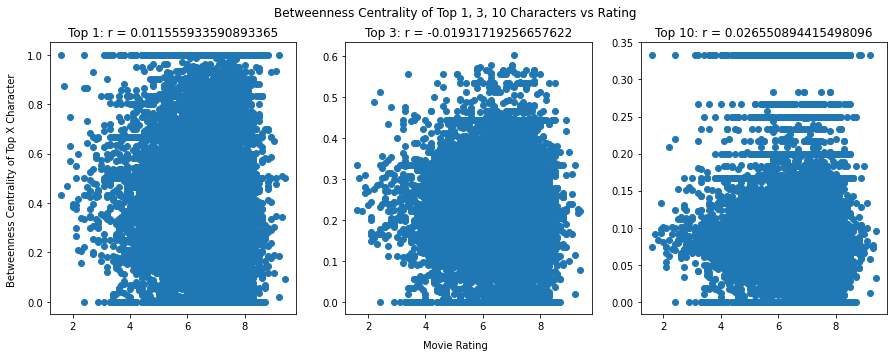

In [15]:
# 3. bc against rating 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(rating, bcTop1)
ax1.set_title(f'Top 1: r = {np.corrcoef(rating, bcTop1)[0,1]}')
ax2.scatter(rating, bcTop3)
ax2.set_title(f'Top 3: r = {np.corrcoef(rating, bcTop3)[0,1]}')
ax3.scatter(rating, bcTop10)
ax3.set_title(f'Top 10: r = {np.corrcoef(rating, bcTop10)[0,1]}')

fig.text(0.5,0.04, "Movie Rating", ha="center", va="center")
fig.text(0.09,0.5, "Betweenness Centrality of Top X Character", ha="center", va="center", rotation=90)

plt.suptitle("Betweenness Centrality of Top 1, 3, 10 Characters vs Rating")

Text(0.5, 0.98, 'Betweenness Centrality of Top 1, 3, 10 Characters vs Year')

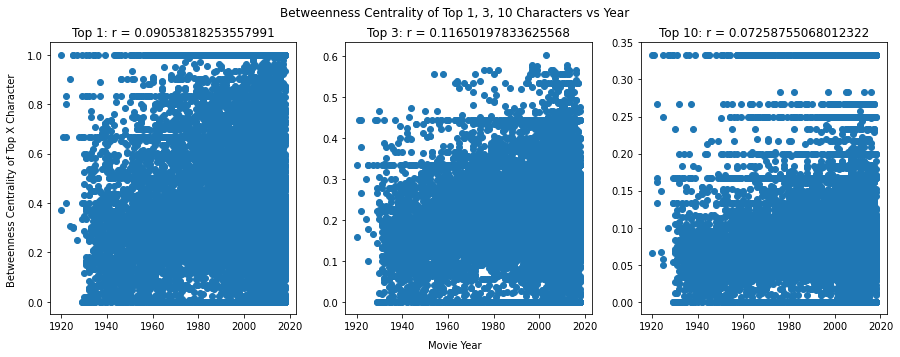

In [16]:
# 4. bc against year 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(year, bcTop1)
ax1.set_title(f'Top 1: r = {np.corrcoef(year, bcTop1)[0,1]}')
ax2.scatter(year, bcTop3)
ax2.set_title(f'Top 3: r = {np.corrcoef(year, bcTop3)[0,1]}')
ax3.scatter(year, bcTop10)
ax3.set_title(f'Top 10: r = {np.corrcoef(year, bcTop10)[0,1]}')

fig.text(0.5,0.04, "Movie Year", ha="center", va="center")
fig.text(0.09,0.5, "Betweenness Centrality of Top X Character", ha="center", va="center", rotation=90)

plt.suptitle("Betweenness Centrality of Top 1, 3, 10 Characters vs Year")

Text(0.5, 0.98, 'PageRank of Top 1, 3, 10 Characters vs Rating')

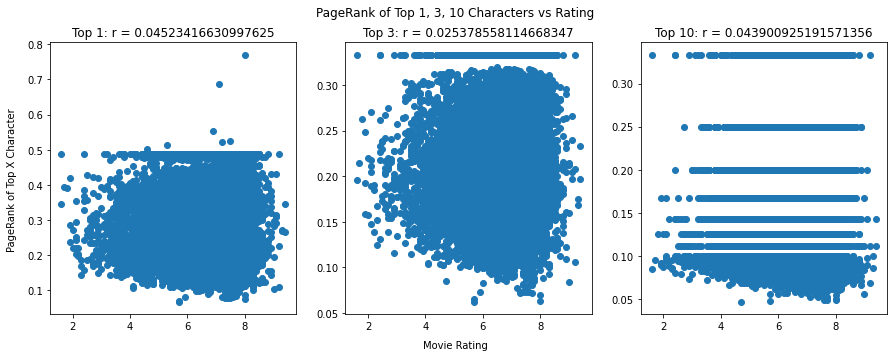

In [17]:
# 5. pr against rating 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(rating, prTop1)
ax1.set_title(f'Top 1: r = {np.corrcoef(rating, prTop1)[0,1]}')
ax2.scatter(rating, prTop3)
ax2.set_title(f'Top 3: r = {np.corrcoef(rating, prTop3)[0,1]}')
ax3.scatter(rating, prTop10)
ax3.set_title(f'Top 10: r = {np.corrcoef(rating, prTop10)[0,1]}')

fig.text(0.5,0.04, "Movie Rating", ha="center", va="center")
fig.text(0.09,0.5, "PageRank of Top X Character", ha="center", va="center", rotation=90)

plt.suptitle("PageRank of Top 1, 3, 10 Characters vs Rating")

Text(0.5, 0.98, 'PageRank of Top 1, 3, 10 Characters vs Year')

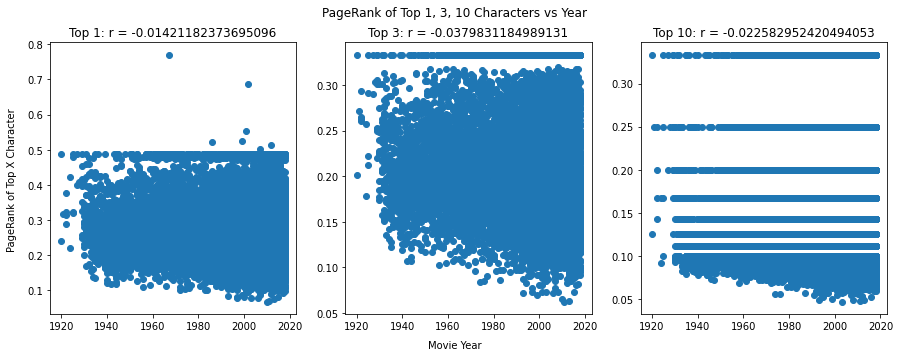

In [18]:
# 6. pr against year 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(year, prTop1)
ax1.set_title(f'Top 1: r = {np.corrcoef(year, prTop1)[0,1]}')
ax2.scatter(year, prTop3)
ax2.set_title(f'Top 3: r = {np.corrcoef(year, prTop3)[0,1]}')
ax3.scatter(year, prTop10)
ax3.set_title(f'Top 10: r = {np.corrcoef(year, prTop10)[0,1]}')

fig.text(0.5,0.04, "Movie Year", ha="center", va="center")
fig.text(0.09,0.5, "PageRank of Top X Character", ha="center", va="center", rotation=90)

plt.suptitle("PageRank of Top 1, 3, 10 Characters vs Year")

In [19]:
# create networkx visualization for select movies
# 1. 1 random graph per century
# 2. 1 random graph per rating
# 3. 1 graph per century with cc as node size
# 4. 1 graph per century with bc as node size
# 5. 1 graph per century with pr as node size
# 6. 1 graph per rating with cc as node size
# 7. 1 graph per rating with bc as node size
# 8. 1 graph per rating with pr as node size

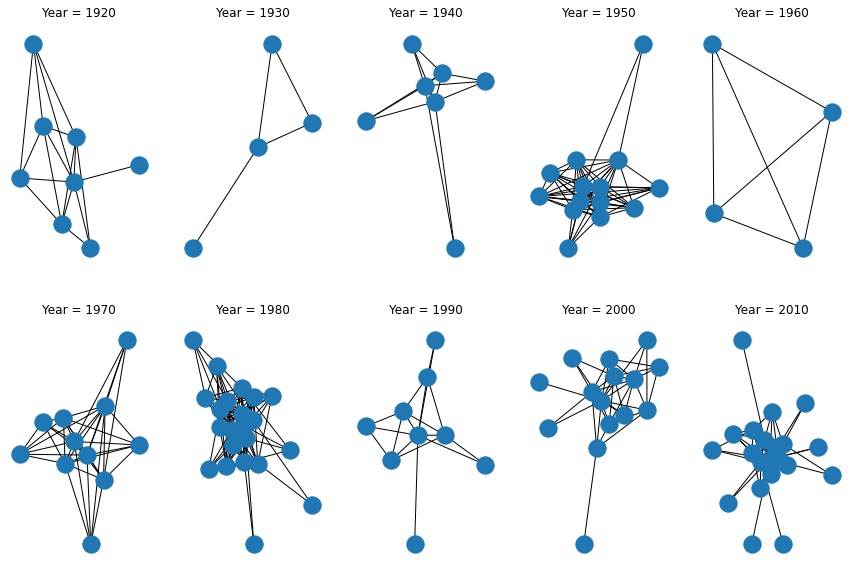

In [20]:
# 1. 1 random graph per century

index_year = []
for i in range(1920,2020,10):
  index_year.append(year.index(i))

fig = plt.figure(figsize=(15,10))

for i in range(len(index_year)):
  fig.add_subplot(2,5,i+1).set_title(f"Year = {year[index_year[i]]}")
  nx.draw(graphs[index_year[i]])

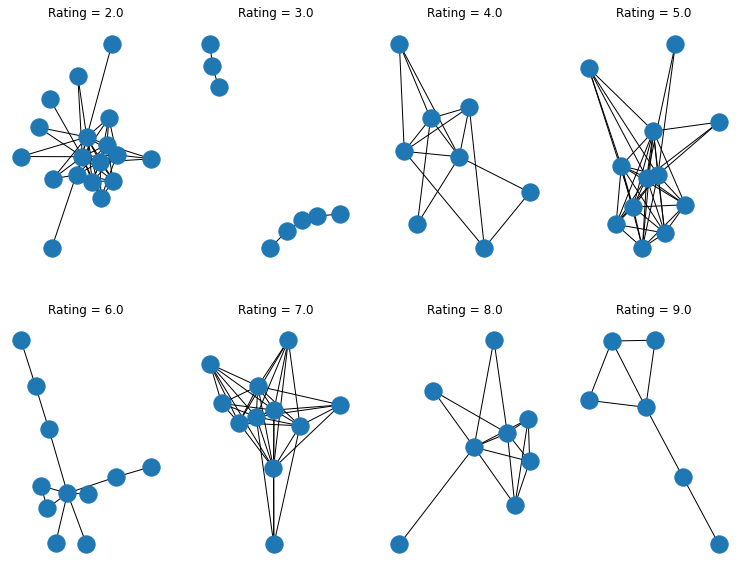

In [21]:
# 2. 1 random graph per rating

index_rating = []
for i in range(2,10,1):
  index_rating.append(rating.index(i))

fig = plt.figure(figsize=(13,10))

for i in range(len(index_rating)):
  fig.add_subplot(2,4,i+1).set_title(f"Rating = {rating[index_rating[i]]}")
  nx.draw(graphs[index_rating[i]])

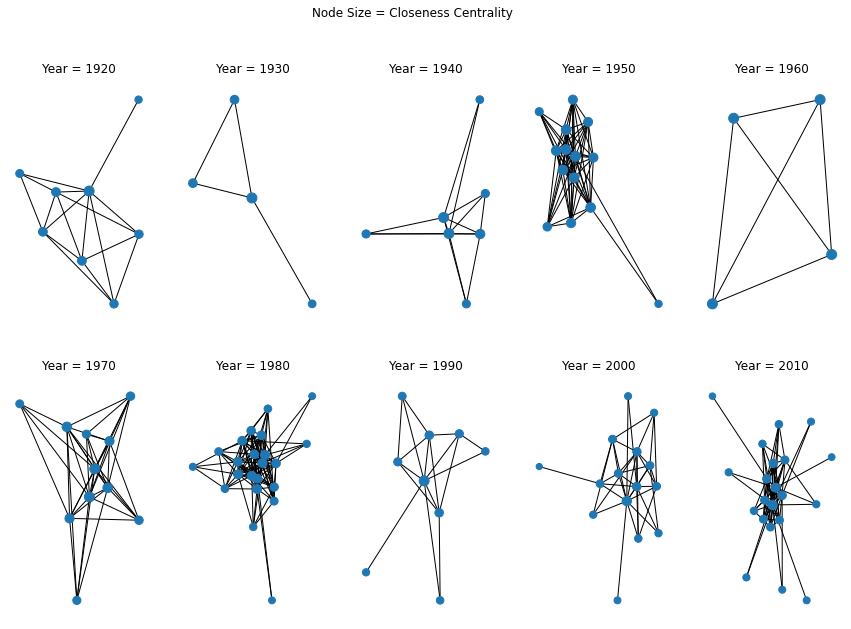

In [22]:
# 3. 1 graph per century with cc as node size

index_year = []
for i in range(1920,2020,10):
  index_year.append(year.index(i))

fig = plt.figure(figsize=(15,10))
fig.suptitle("Node Size = Closeness Centrality")

for i in range(len(index_year)):
  fig.add_subplot(2,5,i+1).set_title(f"Year = {year[index_year[i]]}")
  node_sizes = np.array([cc[index_year[i]][key] for key in list(graphs[index_year[i]].nodes)])*100
  nx.draw(graphs[index_year[i]],node_size = node_sizes)

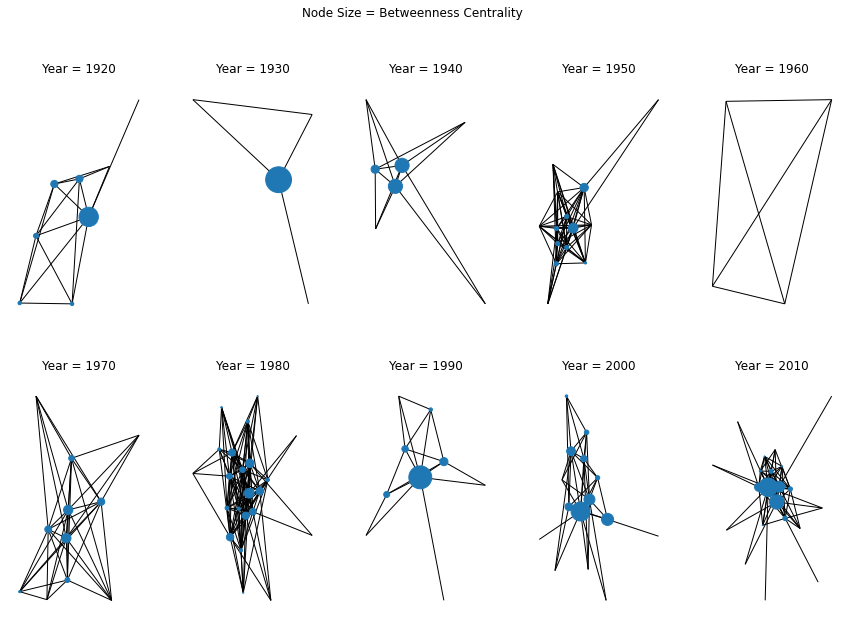

In [23]:
# 4. 1 graph per century with bc as node size

index_year = []
for i in range(1920,2020,10):
  index_year.append(year.index(i))

fig = plt.figure(figsize=(15,10))
fig.suptitle("Node Size = Betweenness Centrality")

for i in range(len(index_year)):
  fig.add_subplot(2,5,i+1).set_title(f"Year = {year[index_year[i]]}")
  node_sizes = np.array([bc[index_year[i]][key] for key in list(graphs[index_year[i]].nodes)])*1000
  nx.draw(graphs[index_year[i]],node_size = node_sizes)

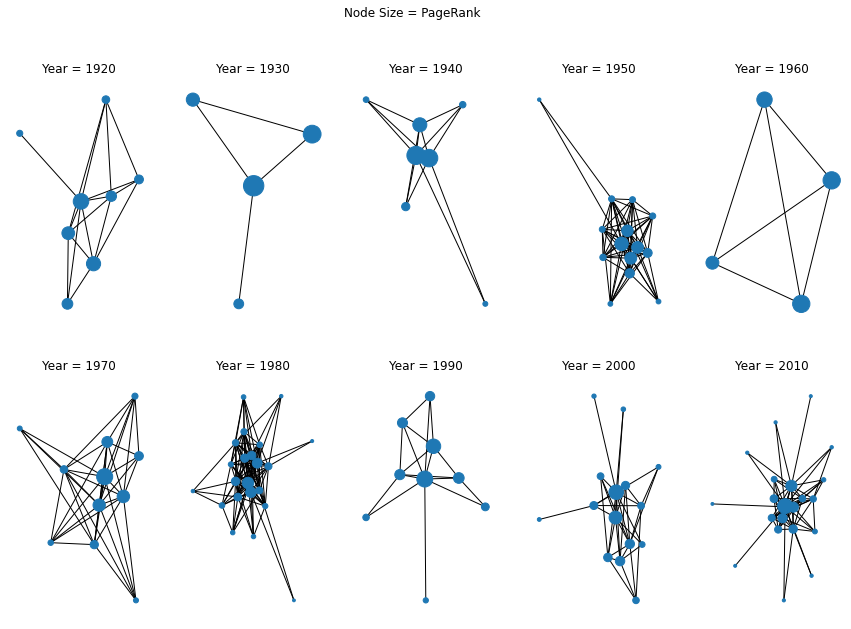

In [24]:
# 5. 1 graph per century with pr as node size

index_year = []
for i in range(1920,2020,10):
  index_year.append(year.index(i))

fig = plt.figure(figsize=(15,10))
fig.suptitle("Node Size = PageRank")

for i in range(len(index_year)):
  fig.add_subplot(2,5,i+1).set_title(f"Year = {year[index_year[i]]}")
  node_sizes = np.array([pr[index_year[i]][key] for key in list(graphs[index_year[i]].nodes)])*1000
  nx.draw(graphs[index_year[i]],node_size = node_sizes)

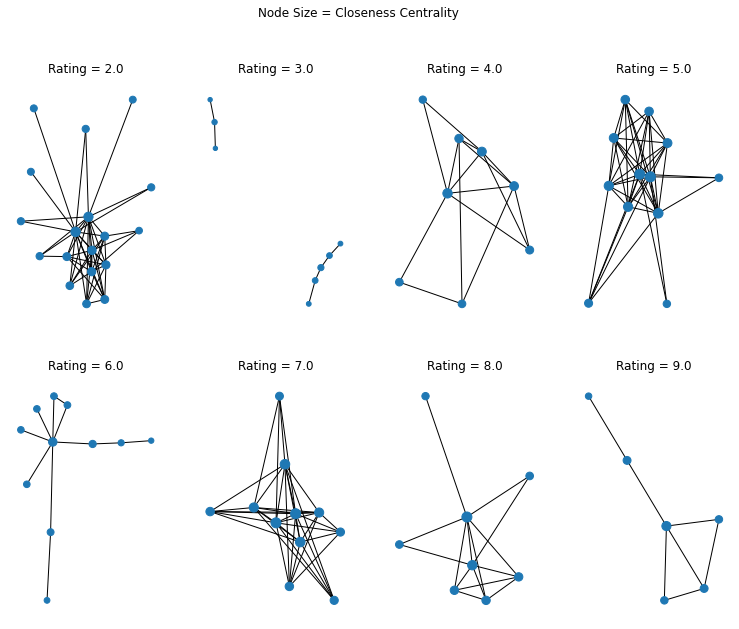

In [25]:
# 6. 1 graph per rating with cc as node size

index_rating = []
for i in range(2,10,1):
  index_rating.append(rating.index(i))

fig = plt.figure(figsize=(13,10))
fig.suptitle("Node Size = Closeness Centrality")

for i in range(len(index_rating)):
  fig.add_subplot(2,4,i+1).set_title(f"Rating = {rating[index_rating[i]]}")
  node_sizes = np.array([cc[index_rating[i]][key] for key in list(graphs[index_rating[i]].nodes)])*100
  nx.draw(graphs[index_rating[i]],node_size = node_sizes)


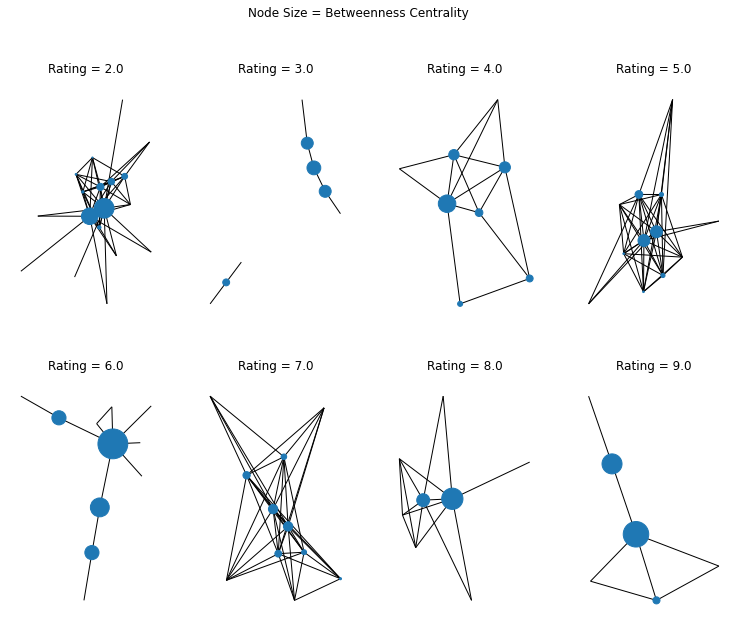

In [26]:
# 7. 1 graph per rating with bc as node size

index_rating = []
for i in range(2,10,1):
  index_rating.append(rating.index(i))

fig = plt.figure(figsize=(13,10))
fig.suptitle("Node Size = Betweenness Centrality")

for i in range(len(index_rating)):
  fig.add_subplot(2,4,i+1).set_title(f"Rating = {rating[index_rating[i]]}")
  node_sizes = np.array([bc[index_rating[i]][key] for key in list(graphs[index_rating[i]].nodes)])*1000
  nx.draw(graphs[index_rating[i]],node_size = node_sizes)

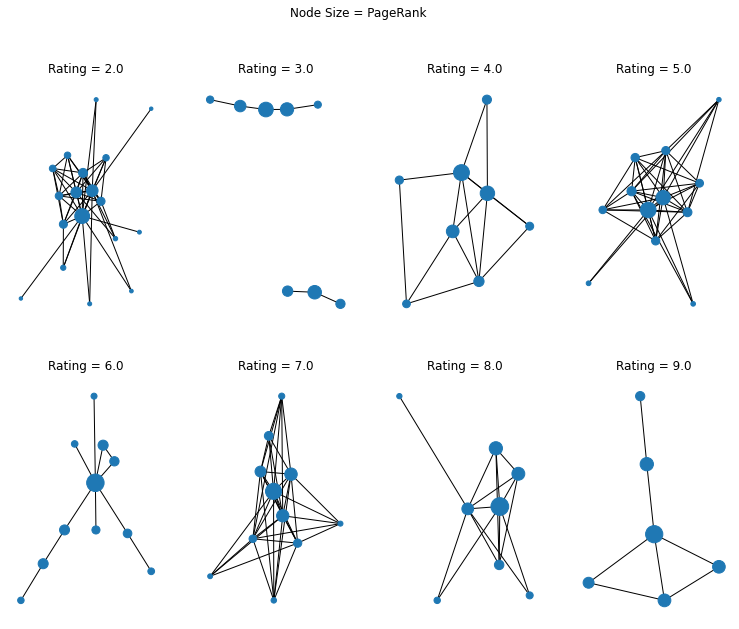

In [27]:
# 8. 1 graph per rating with pr as node size

index_rating = []
for i in range(2,10,1):
  index_rating.append(rating.index(i))

fig = plt.figure(figsize=(13,10))
fig.suptitle("Node Size = PageRank")

for i in range(len(index_rating)):
  fig.add_subplot(2,4,i+1).set_title(f"Rating = {rating[index_rating[i]]}")
  node_sizes = np.array([pr[index_rating[i]][key] for key in list(graphs[index_rating[i]].nodes)])*1000
  nx.draw(graphs[index_rating[i]],node_size = node_sizes)

Text(0.5, 1.0, 'Movie Rating vs Year')

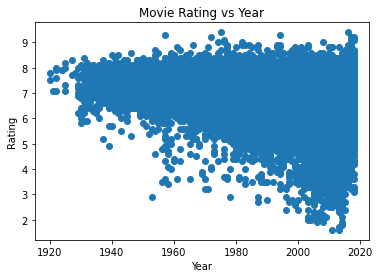

In [28]:
# random plots (exploratory analysis)
plt.scatter(year,rating)
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Movie Rating vs Year")

Text(0.5, 1.0, 'Movie Number of Total Characters vs Year')

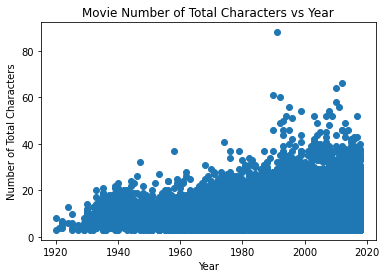

In [29]:
num_nodes = []
for i in range(len(graphs)):
  temp = graphs[i].number_of_nodes()
  num_nodes.append(temp)

plt.scatter(year,num_nodes)
plt.xlabel("Year")
plt.ylabel("Number of Total Characters")
plt.title("Movie Number of Total Characters vs Year")
# more movies with more number of characters in recent years

Text(0.5, 1.0, 'Movie Number of Total Characters vs Rating')

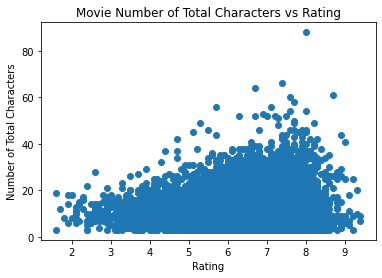

In [30]:
plt.scatter(rating,num_nodes)
plt.xlabel("Rating")
plt.ylabel("Number of Total Characters")
plt.title("Movie Number of Total Characters vs Rating")

Text(0.5, 1.0, 'Average Character Node Degree vs Rating')

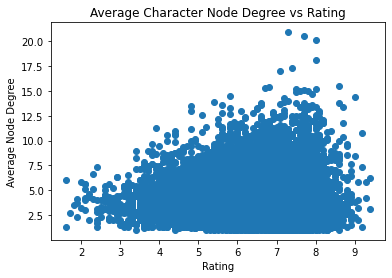

In [31]:
plt.scatter(rating,[np.mean(list(sub_dict.values())) for sub_dict in nd])
plt.xlabel("Rating")
plt.ylabel("Average Node Degree")
plt.title("Average Character Node Degree vs Rating")

Text(0.5, 1.0, 'Average Character Node Degree vs Year')

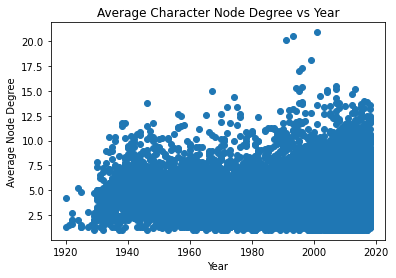

In [32]:
plt.scatter(year,[np.mean(list(sub_dict.values())) for sub_dict in nd])
plt.xlabel("Year")
plt.ylabel("Average Node Degree")
plt.title("Average Character Node Degree vs Year")

In [33]:
from scipy import stats
stats.spearmanr([0,0,0,0,0], [1,1,1,1,1])[0]

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


nan

In [34]:
cc[18]

{'Amir Farrokh Hashemian': 1.0,
 'Bahare Seddiqi': 0.6666666666666666,
 'Mohammad-Hossein Shahidi': 0.6666666666666666}

In [35]:
stats.spearmanr(list(cc[18].values()),list(bc[18].values()))[0]

1.0

In [36]:
import math

temp_cc_bc = 0
for i in range(len(cc)):
  if (math.isnan(stats.spearmanr(list(cc[i].values()),list(bc[i].values()))[0])):
    results = 0
  else:
    results = stats.spearmanr(list(cc[i].values()),list(bc[i].values()))[0]
  
  temp_cc_bc += results

temp_cc_bc = temp_cc_bc/len(cc)
temp_cc_bc

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0.8447821860982465

In [37]:
13127.915171966679/len(cc)

0.8447821860982418

In [38]:
import math

temp_cc_bc = 0
for i in range(len(cc)):
  if (math.isnan(stats.spearmanr(list(cc[i].values()),list(pr[i].values()))[0])):
    results = 0
  else:
    results = stats.spearmanr(list(cc[i].values()),list(pr[i].values()))[0]
  
  temp_cc_bc += results

temp_cc_bc = temp_cc_bc/len(cc)
temp_cc_bc

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0.8288835541072999

In [39]:
import math

temp_cc_bc = 0
for i in range(len(cc)):
  if (math.isnan(stats.spearmanr(list(bc[i].values()),list(pr[i].values()))[0])):
    results = 0
  else:
    results = stats.spearmanr(list(bc[i].values()),list(pr[i].values()))[0]
  
  temp_cc_bc += results

temp_cc_bc = temp_cc_bc/len(cc)
temp_cc_bc

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0.7675692876803853

In [40]:
%%bash
git clone https://github.com/netsiphd/netrd
cd netrd
pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/netrd
  Created wheel for netrd: filename=netrd-0.3.0-py3-none-any.whl size=103977 sha256=794d9162bbe0baa6810260010da1d3ecea77dc4eb875c6410d4b90d116cac2ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-e2wyeehd/wheels/17/14/aa/d49c0443363ba449c133c31b0eb84083770b34e84b75fff0ad
Successfully built netrd
  Attempting uninstall: Sphinx
    Found existing installation: Sphinx 1.8.6
    Uninstalling Sphinx-1.8.6:
      Successfully uninstalled Sphinx-1.8.6
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3


Cloning into 'netrd'...
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.1 which is incompatible.
tensorflow-metadata 1.8.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.1 which is incompatible.
googleapis-common-protos 1.56.2 requires protobuf<4.0.0dev,>=3.15.0, but you have protobuf 4.21.1 which is incompatible.
google-api-core 1.31.6 requires protobuf<4.0.0dev,>=3.

In [41]:
import netrd

In [42]:
netrd.distance.OnionDivergence().dist(graphs[100], graphs[981])


/usr/local/lib/python3.7/dist-packages/netrd/utilities/graph.py:118: RuntimeWarning: Coercing weighted graph to unweighted.
  warnings.warn("Coercing weighted graph to unweighted.", RuntimeWarning)


0.9999999999999992

In [43]:
import random

rand_index = random.sample(range(0,len(graphs)),500)

import itertools

comb_random = list(itertools.combinations(rand_index,2))

In [44]:
rand_index

[13941,
 6889,
 2467,
 14780,
 720,
 4592,
 10723,
 7704,
 10842,
 3480,
 286,
 7342,
 351,
 15193,
 388,
 1872,
 9112,
 12123,
 13330,
 3624,
 12112,
 9176,
 9686,
 2916,
 13257,
 2022,
 14521,
 10115,
 6479,
 5187,
 6039,
 1115,
 2559,
 2553,
 360,
 9141,
 4577,
 12984,
 10477,
 5079,
 4409,
 11628,
 8191,
 10517,
 7282,
 11071,
 11662,
 11421,
 11024,
 12909,
 8553,
 5326,
 4616,
 14948,
 5344,
 10515,
 7778,
 4351,
 12528,
 14649,
 14009,
 3787,
 7973,
 7983,
 3237,
 13020,
 15255,
 2193,
 6847,
 369,
 2524,
 5235,
 4957,
 4675,
 11173,
 5163,
 8605,
 8804,
 7687,
 6757,
 13764,
 8304,
 12212,
 3308,
 14913,
 12030,
 6517,
 84,
 11081,
 8795,
 3444,
 14895,
 15286,
 10911,
 7908,
 108,
 9087,
 3058,
 9509,
 11206,
 3864,
 12173,
 5149,
 12994,
 1538,
 9253,
 389,
 14027,
 12337,
 6204,
 3071,
 4932,
 1144,
 8185,
 5920,
 9399,
 271,
 14010,
 7590,
 15280,
 2260,
 14834,
 8715,
 1002,
 3432,
 6544,
 11502,
 2941,
 12463,
 10453,
 57,
 14301,
 6818,
 3807,
 9666,
 12117,
 509,
 15176

In [45]:
for i in range(len(comb_random)):
  

SyntaxError: ignored

In [ ]:
len(graphs)

In [ ]:
# select random graphs to compare graph distances
# select 10 random movies before 1950 and 10 random movies after 2010

import random

full_index_old = []
for i in range(len(year)):
  if (year[i]<=1950):
    full_index_old.append(i)
  
rand_index_old = random.sample(full_index_old, 10)

full_index_new = []
for i in range(len(year)):
  if (year[i]>=2010):
    full_index_new.append(i)
  
rand_index_new = random.sample(full_index_new, 10)

import itertools
comb_old = list(itertools.combinations(rand_index_old,2))
comb_new = list(itertools.combinations(rand_index_new,2))
comb_mix = list(itertools.product(rand_index_old, rand_index_new))

In [ ]:
dist_old = []
dist_new = []
dist_mix = []

for i in range(len(comb_old)):
  temp_dist = nx.graph_edit_distance(graphs[comb_old[i][0]], graphs[comb_old[i][1]])
  dist_old.append(temp_dist)
  print(i)

In [ ]:
for i in range(len(comb_new)):
  temp_dist = nx.graph_edit_distance(graphs[comb_new[i][0]], graphs[comb_new[i][1]])
  dist_new.append(temp_dist)


In [ ]:
for i in range(len(comb_mix)):
  temp_dist = nx.graph_edit_distance(graphs[comb_mix[i][0]], graphs[comb_mix[i][1]])
  dist_mix.append(temp_dist)

In [ ]:
# present in a dataframe form with movie name, year, average distances